In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
df_bubble = pd.read_csv('test.csv',sep=',')
df = pd.read_csv('FINAL_DESCRIPTIVE.csv',sep=',')

df_combo = df.copy()
years = ['2019' , '2020']
year = ['2019']

df_combo= df_combo[df_combo.year.isin(years)]
df_temp = df_combo[df_combo.year.isin(year)]
df_temp['month'] = df_temp['month'] - 1

test_bar = df.groupby('rest_rating').agg(count=('rest_rating' , 'size') , review_mean = ('rest_rating' , 'mean'))
test_price = df.groupby('rest_price_cat').agg(count=('rest_price_cat' , 'size') , review_mean = ('rest_rating' , 'mean'))

In [24]:
"""df = pd.DataFrame()
df['review'] = np.random.randint(1 , 6  , size = 1000)
df['price'] = np.random.randint(2 , 9 , size = 1000) / 2
df['type'] = 'type1'
df['type'].iloc[:666] = 'type2'
df['type'].iloc[500:] = 'type3'
df['type'].iloc[:100] = 'type1'
df['year'] = np.random.randint(2019 , 2021 , size = 1000)
df['month'] = np.random.randint(1 , 13 , size = 1000)
df['temp'] = np.random.randint(-5 , 28 , size = 1000)

#altering so combo chart works
df2 = df.copy()
df2['month'] = df2['month'] - 1 """

"df = pd.DataFrame()\ndf['review'] = np.random.randint(1 , 6  , size = 1000)\ndf['price'] = np.random.randint(2 , 9 , size = 1000) / 2\ndf['type'] = 'type1'\ndf['type'].iloc[:666] = 'type2'\ndf['type'].iloc[500:] = 'type3'\ndf['type'].iloc[:100] = 'type1'\ndf['year'] = np.random.randint(2019 , 2021 , size = 1000)\ndf['month'] = np.random.randint(1 , 13 , size = 1000)\ndf['temp'] = np.random.randint(-5 , 28 , size = 1000)\n\n#altering so combo chart works\ndf2 = df.copy()\ndf2['month'] = df2['month'] - 1 "

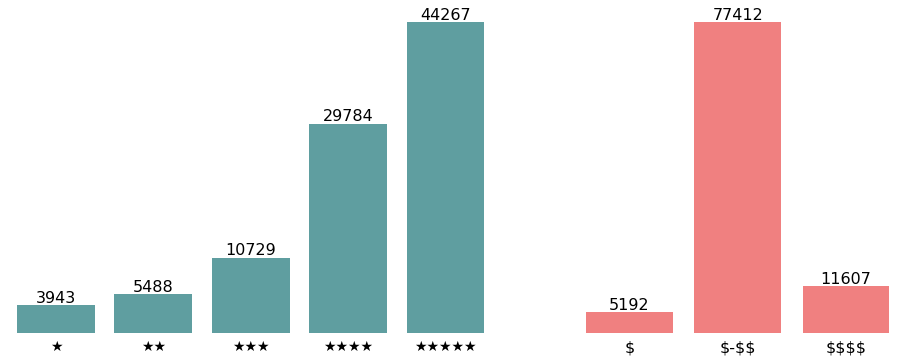

In [41]:
#FREQUENCY PLOTS

fig , (ax , ax2) = plt.subplots(1 , 2 , figsize = (16, 6) , sharey = False , gridspec_kw={'width_ratios' : [1.5 , 1]})

#First plot

ax = sns.barplot(x = ["★","★★","★★★","★★★★","★★★★★"] , y = test_bar['count'] , data =test_bar , color = 'cadetblue' , saturation = 1 , ax = ax)

#ax.set_title('Frequency of Review scores' , loc = 'left' , fontsize = 20)

ax.set_xticklabels(["★","★★","★★★","★★★★","★★★★★"] , fontsize = 14)

ax.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False) #Removes ticks

ax.get_yaxis().set_visible(False)

#Adding data values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=16, ha='center', va='bottom' , color = 'black')

#Second plot

ax2 = sns.barplot(x = ['\$' , '$-$$' , '\$$$$'] , y = test_price['count'] , data = test_price , color = 'lightcoral' , saturation = 1 , ax = ax2)

#ax2.set_title('Restaurant prices' , loc = 'left' , fontsize = 20)

ax2.set_xticklabels(['$' , '$-$$' , '\$$$$'] , fontsize = 16)

ax2.tick_params(axis = 'x' , which = 'both' , bottom = False , top = False) #Removes ticks

ax2.get_yaxis().set_visible(False)

for p in ax2.patches:
    ax2.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), 
            fontsize=16, ha='center', va='bottom' , color = 'black')


sns.despine(left = True , bottom = True) #Removes border

plt.savefig('freq_plot.png')

In [42]:
#Constructing compatable data for bubble plot
test = df_bubble.groupby('rest2').agg(count=('rest_rating' , 'size') , review_mean = ('rest_rating' , 'mean') , price_mean = ('rest_price_cat' , 'mean'))
test

,count,review_mean,price_mean
rest2,,,
Afrikansk,4,4.500000,1.125000
Amerikansk,56,4.071429,2.258929
Asiatisk,74,4.047297,2.074324
Bar,100,4.070000,2.225000
Café,101,4.252475,2.118812
Europæisk,212,4.183962,2.504717
Fastfood,39,4.307692,1.448718
Fisk og skaldyr,29,4.189655,2.620690
Fransk,67,4.261194,2.679104


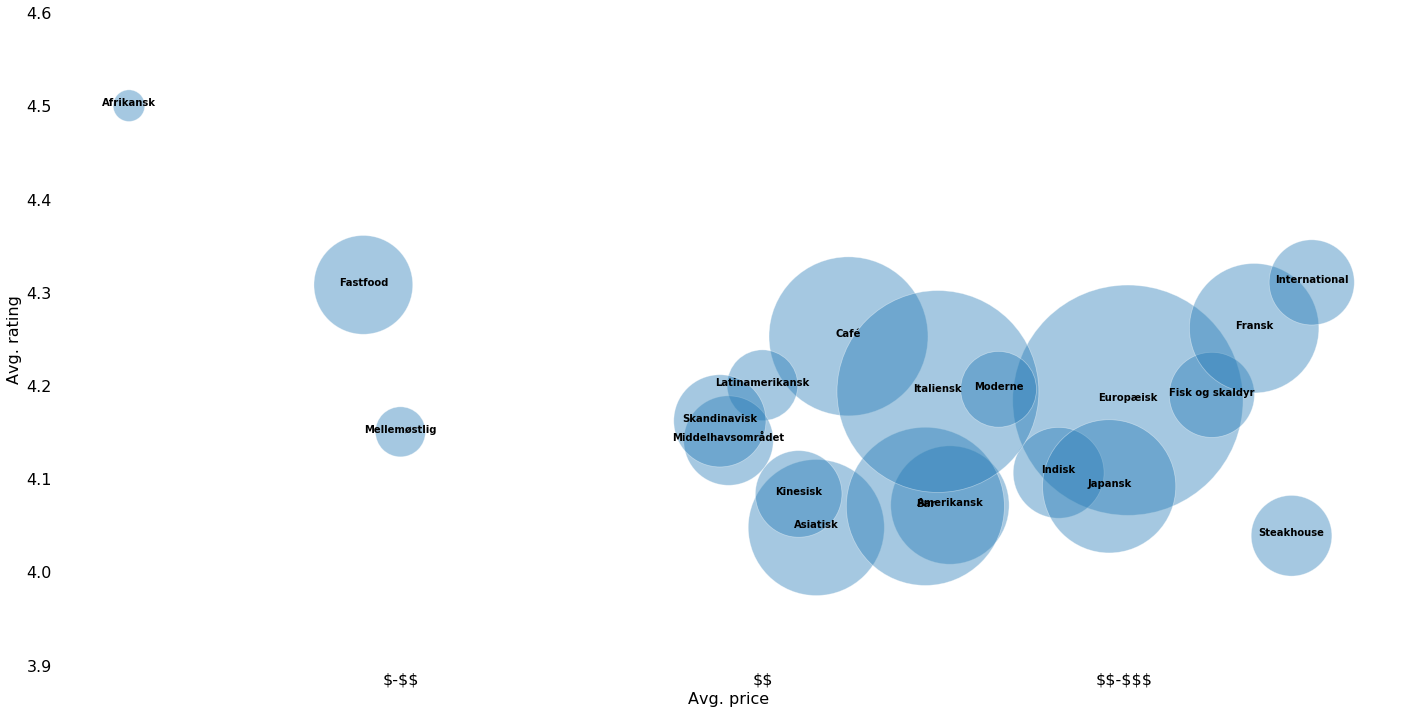

In [43]:
#BUBBLE SCHART

fig , ax = plt.subplots(1 , figsize = (24, 12))

ax = sns.scatterplot(x = test['price_mean'] , y = test['review_mean'] , s = test['count'] * 250 , data = test , alpha = 0.4 , cmap = 'cadetblue' , ax = ax)

#ax.set_title('Avg. price and score for kitchen types' , loc = 'left' , fontsize = 20)
#ax.set_xlim(0 , 5)
ax.set_ylim(3.9 , 4.6)

ax.set_xticklabels(['$' , '' , '\$-\$$', '' , '\$$' , '' , '$$-$$$'] , fontsize = 12)

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , labelsize = 16) #Removes ticks
ax.xaxis.set_label_text("Avg. price" , fontsize = 16) #Removes axis name
ax.yaxis.set_label_text("Avg. rating" , fontsize = 16) #Removes axis name

#ax.xaxis.label.set_visible(False)
#ax.yaxis.label.set_visible(False)

sns.despine(left = True , bottom = True) #Removes border

#Adding data labels
for line in range(0,test.shape[0]):
     ax.text(test['price_mean'][line], test['review_mean'][line], test.index[line], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.savefig('Bubble-plot.png')

In [44]:
df['rest_rating'].groupby(by = df['month']).mean()
#df['price'].groupby(by = df['price']).mean()

month
1     4.129191
2     4.131921
3     4.135696
4     4.114773
5     4.143259
6     4.123830
7     4.119585
8     4.107252
9     4.092934
10    4.102923
11    4.095620
12    4.062465
Name: rest_rating, dtype: float64

In [45]:
teest = pd.value_counts(df['month'].values , sort = False)
teest

1     6115
2     7929
3     7421
4     7615
5     8523
6     9085
7     9349
8     9156
9     7274
10    7423
11    7101
12    7220
dtype: int64

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


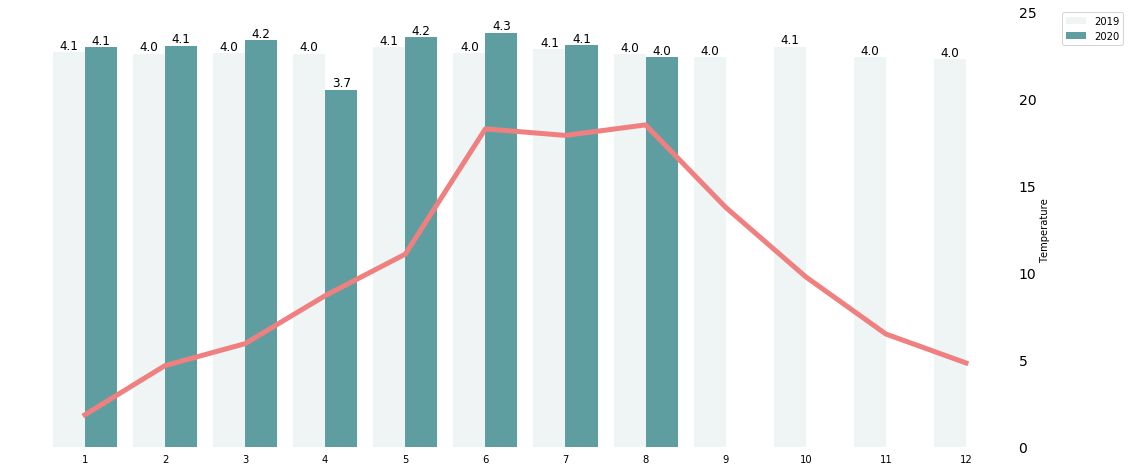

In [62]:
#Combo-chart

fig , ax = plt.subplots(1 , figsize = (18, 8))


#Bar chart
ax = sns.barplot(x = 'month' , y = 'rest_rating' , data = df_combo , hue = 'year' , color = 'cadetblue' , saturation = 1 , ax = ax , ci = None)
#ax.set_title('Avg Monthly score and temperature by year' , loc = 'left' , fontsize = 20)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.) #Location of legend

ax.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False) #Removes ticks
ax.xaxis.set_label_text("") #Removes axis name
ax.set_ylim(0, )

ax.get_yaxis().set_visible(False)


#Data labels
for p in ax.patches:
    ax.text((p.get_x()) + p.get_width()/2., p.get_height(), '{0:.1f}'.format(p.get_height()), 
            fontsize=12, ha='center', va='bottom')

#Adding secondary axis
ax2 = ax.twinx()
ax2 = sns.lineplot(x = 'month' , y = 'value' , data = df_temp , color = 'lightcoral' , linewidth = 5, ax = ax2 , ci = None)
#ax2.legend(bbox_to_anchor=(1.05, 1), loc=3, borderaxespad=0.) #Location of legend
ax2.set_ylim(0, 25)
ax2.tick_params(axis = 'both' , which = 'both' , bottom = False , top = False , left = False , right = False , labelsize = 14) #Removes ticks
ax2.yaxis.set_label_text("Temperature") #Removes axis name

#ax2.get_yaxis().set_visible(False)

sns.despine(left = True , bottom = True , right = True) #Removes border

plt.savefig('Score_Temp_year.png')